Epoch 0, Loss: 2.7071
Epoch 100, Loss: 0.0226
Epoch 200, Loss: 0.0145
Epoch 300, Loss: 0.0078
Epoch 400, Loss: 0.0043
Epoch 500, Loss: 0.0029
Epoch 600, Loss: 0.0021
Epoch 700, Loss: 0.0016
Epoch 800, Loss: 0.0013
Epoch 900, Loss: 0.0011
Test Accuracy: 95.61%


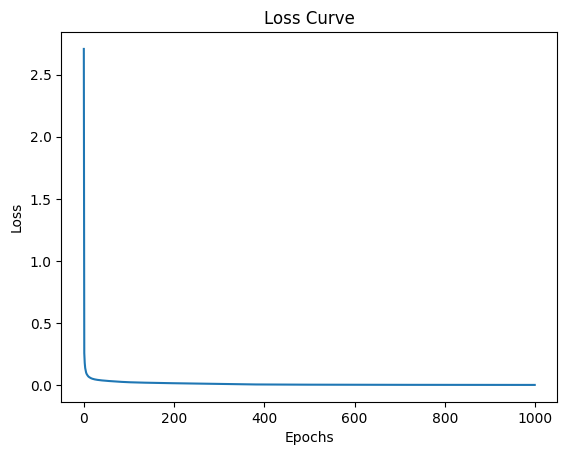

In [1]:
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.datasets import load_breast_cancer 
import matplotlib.pyplot as plt 
# Load dataset 
data = load_breast_cancer() 
X = data.data 
y = data.target.reshape(-1, 1) 
# Normalize 
scaler = StandardScaler() 
X = scaler.fit_transform(X) 
# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 
# Initialize weights and biases 
input_dim = X.shape[1] 
hidden_dim = 10 
output_dim = 1 
W1 = np.random.randn(input_dim, hidden_dim) 
b1 = np.zeros((1, hidden_dim)) 
W2 = np.random.randn(hidden_dim, output_dim) 
b2 = np.zeros((1, output_dim)) 
def sigmoid(z): return 1 / (1 + np.exp(-z)) 
def tanh_derivative(a): return 1 - np.power(a, 2) 
epochs = 1000 
lr = 0.01 
losses = [] 
for epoch in range(epochs): 
    # Forward pass 
    Z1 = np.dot(X_train, W1) + b1 
    A1 = np.tanh(Z1) 
    Z2 = np.dot(A1, W2) + b2 
    A2 = sigmoid(Z2) 
    # Loss 
    loss = -np.mean(y_train * np.log(A2 + 1e-9) + (1 - y_train) * np.log(1 - A2 + 1e-9)) 
    losses.append(loss) 
    # Backward pass 
    dZ2 = A2 - y_train 
    dW2 = np.dot(A1.T, dZ2) 
    db2 = np.sum(dZ2, axis=0, keepdims=True) 
    dA1 = np.dot(dZ2, W2.T) 
    dZ1 = dA1 * tanh_derivative(A1) 
    dW1 = np.dot(X_train.T, dZ1) 
    db1 = np.sum(dZ1, axis=0) 
    # Update 
    W1 -= lr * dW1 
    b1 -= lr * db1 
    W2 -= lr * dW2 
    b2 -= lr * db2 
    if epoch % 100 == 0: 
        print(f"Epoch {epoch}, Loss: {loss:.4f}") 
# Prediction 
Z1_test = np.dot(X_test, W1) + b1 
A1_test = np.tanh(Z1_test) 
Z2_test = np.dot(A1_test, W2) + b2 
A2_test = sigmoid(Z2_test) 
y_pred = (A2_test > 0.5).astype(int) 
accuracy = np.mean(y_pred == y_test) * 100 
print(f"Test Accuracy: {accuracy:.2f}%") 
# Plot loss curve 
plt.plot(losses) 
plt.title("Loss Curve") 
plt.xlabel("Epochs") 
plt.ylabel("Loss") 
plt.show()